**Download Dataset**

You can download Tay's latest lyrics dataset from Kaggle here.

https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums

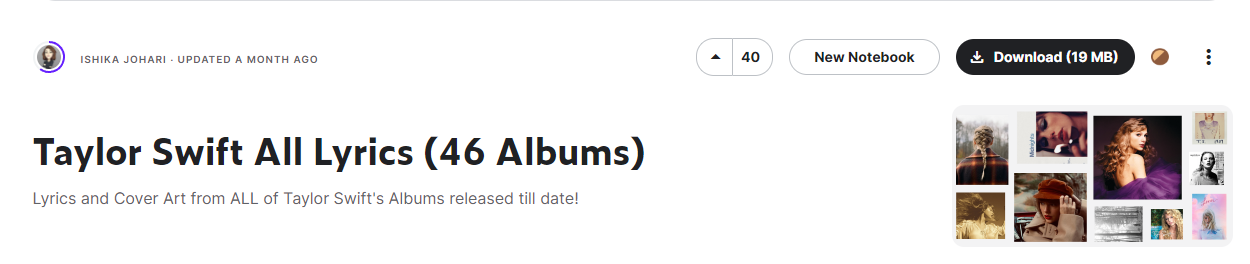

**Mount Google Drive:**

If your lyric text files are stored on Google Drive, you can mount it in Google Colab to access the files.

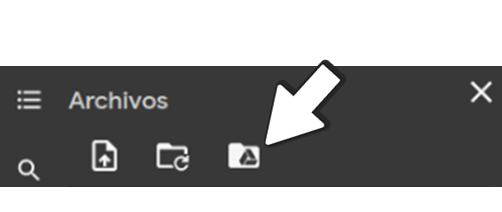

**Import Necessary Libraries:**

Import the required libraries, similar to the previous response.

In [1]:
!pip install nltk

In [2]:
import os
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Load Lyrics Text Files:

Load the lyric text files from each album folder and store them in a list.

In [3]:
album_folders = [
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/TaylorSwift",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Fearless_TaylorsVersion_",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/SpeakNow_TaylorsVersion_",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Red_TaylorsVersion_",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/1989",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Reputation",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Lover",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Folklore",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/evermore_deluxeversion_",
    "/content/drive/MyDrive/Taylor Swift Lyrics/main_album/Midnights_TheTillDawnEdition_",
    # Add paths for all album folders
]

In [4]:
lyrics_data = []

# Iterate through each album folder
for album_folder in album_folders:
    # Extract the album name from the folder path
    album_name = os.path.basename(album_folder)

    # Get the list of filenames in the album folder and sort them
    filenames = sorted(os.listdir(album_folder))

    # Initialize track number
    track_number = 1

    # Iterate through each file in the album folder
    for file_name in filenames:
        # Check if the file is a text file
        if file_name.endswith(".txt"):
            # Extract the song name from the file name
            parts = os.path.splitext(file_name)[0].split("_")
            song_name = "_".join(parts[:-1]) if len(parts) > 1 else parts[0]

            # Open the file and read the lines of lyrics
            with open(os.path.join(album_folder, file_name), "r") as file:
                lyrics = file.readlines()

                # Reset line number for the new song
                line_number = 0

                # Iterate through lines, tracking line number
                for line in lyrics[1:]:
                    line_number += 1  # Increment line number

                    # Extract and preprocess the line of lyrics
                    processed_lyrics = line.strip()

                    # Create a dictionary entry for the lyrics data and add it to the list
                    lyrics_entry = {
                        "album": album_name,
                        "song_name": song_name,
                        "track_number": track_number,
                        "line_number": line_number,
                        "processed_lyrics": processed_lyrics
                    }
                    lyrics_data.append(lyrics_entry)

                # Increment track number for the next song
                track_number += 1


**Create a DataFrame:**

Convert the lyrics data into a Pandas DataFrame.

In [5]:
# Convert the list of dictionaries to a DataFrame
data = pd.DataFrame(lyrics_data)

In [6]:
data.head()

,album,song_name,track_number,line_number,processed_lyrics
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make


In [7]:
data.describe()

,track_number,line_number
count,12850.000000,12850.000000
mean,11.127704,33.947471
std,6.972743,21.109810
min,1.000000,1.000000
25%,5.000000,16.000000
50%,10.000000,32.000000
75%,16.000000,49.000000
max,31.000000,130.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12850 entries, 0 to 12849
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   album             12850 non-null  object
 1   song_name         12850 non-null  object
 2   track_number      12850 non-null  int64 
 3   line_number       12850 non-null  int64 
 4   processed_lyrics  12850 non-null  object
dtypes: int64(2), object(3)
memory usage: 502.1+ KB


Save Processed Data:

Save the preprocessed data as a CSV file.

In [9]:
data.to_csv("/content/drive/MyDrive/Taylor Swift Lyrics/TaylorSwiftLyrics.csv", index=False)

Make sure to replace the album_folders list with the actual paths to the folders containing the text files for each album on your Google Drive. Also, adjust the output CSV file path as needed.

In [10]:
data_lyrics = pd.read_csv("/content/drive/MyDrive/Taylor Swift Lyrics/TaylorSwiftLyrics.csv")

In [11]:
data_lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make


In [12]:
data_lyrics.describe()

,track_number,line_number
count,12850.000000,12850.000000
mean,11.127704,33.947471
std,6.972743,21.109810
min,1.000000,1.000000
25%,5.000000,16.000000
50%,10.000000,32.000000
75%,16.000000,49.000000
max,31.000000,130.000000
